# Dataset Analysis - Dataset B
Copyright (C) 2021 ServiceNow, Inc.

This notebook applies the preprocessing cleaning pipeline (v1) to Dataset B, investigating the effect of the various pipeline steps.

In [1]:
import pathlib
import pandas as pd
import re

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
PDF_DIR = '/nrcan_p2/data/01_raw/20210108'

#pdfs = [x for x in pathlib.Path(PDF_DIR).glob('**/*.pdf')]
pdfs = [x for x in pathlib.Path(PDF_DIR).rglob('*.pdf')]
pdfs_rel = [pdf.relative_to(PDF_DIR) for pdf in pdfs]
pdfs_rel[0]
pdfs_base = [pathlib.Path(re.sub('/', '__', str(pdf))).stem for pdf in pdfs_rel]
pdfs_base[0]

'bc__geofile__BCGS_GF1996-01'

In [4]:
pdfs_df = pd.DataFrame({'file': pdfs, 'base': pdfs_base})
pdfs_df

,file,base
0,/nrcan_p2/data/01_raw/20210108/bc/geofile/BCGS...,bc__geofile__BCGS_GF1996-01
1,/nrcan_p2/data/01_raw/20210108/bc/geofile/BCGS...,bc__geofile__BCGS_GF1997-01
2,/nrcan_p2/data/01_raw/20210108/bc/geofile/BCGS...,bc__geofile__BCGS_GF1997-02
3,/nrcan_p2/data/01_raw/20210108/bc/geofile/BCGS...,bc__geofile__BCGS_GF1998-01
4,/nrcan_p2/data/01_raw/20210108/bc/geofile/BCGS...,bc__geofile__BCGS_GF1998-02
...,...,...
13893,/nrcan_p2/data/01_raw/20210108/ontario/lists/s...,ontario__lists__sv04-01
13894,/nrcan_p2/data/01_raw/20210108/ontario/lists/S...,ontario__lists__SV04-02
13895,/nrcan_p2/data/01_raw/20210108/ontario/lists/S...,ontario__lists__SV05
13896,/nrcan_p2/data/01_raw/20210108/ontario/lists/S...,ontario__lists__SV06


In [5]:
CSV_DIR = '/nrcan_p2/data/02_intermediate/20210108'

csvs = [x for x in pathlib.Path(CSV_DIR).rglob('*.csv')]

In [6]:
len(csvs)

13545

In [7]:
csvs_df = pd.DataFrame({'file': csvs})
csvs_df

,file
0,/nrcan_p2/data/02_intermediate/20210108/bc__ge...
1,/nrcan_p2/data/02_intermediate/20210108/bc__ge...
2,/nrcan_p2/data/02_intermediate/20210108/bc__ge...
3,/nrcan_p2/data/02_intermediate/20210108/bc__ge...
4,/nrcan_p2/data/02_intermediate/20210108/bc__ge...
...,...
13540,/nrcan_p2/data/02_intermediate/20210108/ontari...
13541,/nrcan_p2/data/02_intermediate/20210108/ontari...
13542,/nrcan_p2/data/02_intermediate/20210108/ontari...
13543,/nrcan_p2/data/02_intermediate/20210108/ontari...


In [8]:
csvs_df['rel'] = csvs_df.file.apply(lambda x: x.relative_to(CSV_DIR))
csvs_df['base'] = csvs_df.rel.apply(lambda x: pathlib.Path(pathlib.Path(x.stem).stem).stem) #.stem for csv in csvs_rel]

In [9]:
csvs_df

,file,rel,base
0,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,bc__geofile__BCGS_GF1996-01.pdfminer_split.txt...,bc__geofile__BCGS_GF1996-01
1,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,bc__geofile__BCGS_GF1997-01.pdfminer_split.txt...,bc__geofile__BCGS_GF1997-01
2,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,bc__geofile__BCGS_GF1997-02.pdfminer_split.txt...,bc__geofile__BCGS_GF1997-02
3,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,bc__geofile__BCGS_GF1998-01.pdfminer_split.txt...,bc__geofile__BCGS_GF1998-01
4,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,bc__geofile__BCGS_GF1998-02.pdfminer_split.txt...,bc__geofile__BCGS_GF1998-02
...,...,...,...
13540,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__ARIP105.pdfminer_split.txt.csv,ontario__lists__ARIP105
13541,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__OFR5467.pdfminer_split.txt.csv,ontario__lists__OFR5467
13542,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__OFR5479.pdfminer_split.txt.csv,ontario__lists__OFR5479
13543,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__ofr5997.pdfminer_split.txt.csv,ontario__lists__ofr5997


In [10]:
csvs_df['folder'] = csvs_df.file.apply(lambda x: x.parent / '/'.join(x.stem.split('__')[:-1]))

In [11]:
files_df = pd.merge(csvs_df, pdfs_df, on='base', how='left', suffixes=('', '_pdf'))

In [12]:
files_df.folder.value_counts()

/nrcan_p2/data/02_intermediate/20210108/ontario/lists                           10372
/nrcan_p2/data/02_intermediate/20210108/bc/paper                                 1614
/nrcan_p2/data/02_intermediate/20210108/alberta                                   918
/nrcan_p2/data/02_intermediate/20210108/bc/geofile                                217
/nrcan_p2/data/02_intermediate/20210108/bc/petrolium_geoscience_publications      209
/nrcan_p2/data/02_intermediate/20210108/bc/geology_exploration_mining             164
/nrcan_p2/data/02_intermediate/20210108/bc/geoscience_bc                           51
Name: folder, dtype: int64

In [13]:
sample_df = files_df.groupby('folder').sample(50)
sample_df

,file,rel,base,folder,file_pdf
1883,/nrcan_p2/data/02_intermediate/20210108/albert...,alberta__document_ESR_ESR_1966_02.pdfminer_spl...,alberta__document_ESR_ESR_1966_02,/nrcan_p2/data/02_intermediate/20210108/alberta,/nrcan_p2/data/01_raw/20210108/alberta/documen...
5600,/nrcan_p2/data/02_intermediate/20210108/albert...,alberta__document_OFR_OFR_2012_01.pdfminer_spl...,alberta__document_OFR_OFR_2012_01,/nrcan_p2/data/02_intermediate/20210108/alberta,/nrcan_p2/data/01_raw/20210108/alberta/documen...
2879,/nrcan_p2/data/02_intermediate/20210108/albert...,alberta__document_REP_REP_48.pdfminer_split.tx...,alberta__document_REP_REP_48,/nrcan_p2/data/02_intermediate/20210108/alberta,/nrcan_p2/data/01_raw/20210108/alberta/documen...
1659,/nrcan_p2/data/02_intermediate/20210108/albert...,alberta__document_ESR_ESR_1966_06.pdfminer_spl...,alberta__document_ESR_ESR_1966_06,/nrcan_p2/data/02_intermediate/20210108/alberta,/nrcan_p2/data/01_raw/20210108/alberta/documen...
766,/nrcan_p2/data/02_intermediate/20210108/albert...,alberta__document_OFR_OFR_1973_25.pdfminer_spl...,alberta__document_OFR_OFR_1973_25,/nrcan_p2/data/02_intermediate/20210108/alberta,/nrcan_p2/data/01_raw/20210108/alberta/documen...
...,...,...,...,...,...
3994,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__MRD076.pdfminer_split.txt.csv,ontario__lists__MRD076,/nrcan_p2/data/02_intermediate/20210108/ontari...,/nrcan_p2/data/01_raw/20210108/ontario/lists/M...
3059,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__m1934A.pdfminer_split.txt.csv,ontario__lists__m1934A,/nrcan_p2/data/02_intermediate/20210108/ontari...,/nrcan_p2/data/01_raw/20210108/ontario/lists/m...
3947,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__m81724.pdfminer_split.txt.csv,ontario__lists__m81724,/nrcan_p2/data/02_intermediate/20210108/ontari...,/nrcan_p2/data/01_raw/20210108/ontario/lists/m...
3443,/nrcan_p2/data/02_intermediate/20210108/ontari...,ontario__lists__gdif610.pdfminer_split.txt.csv,ontario__lists__gdif610,/nrcan_p2/data/02_intermediate/20210108/ontari...,/nrcan_p2/data/01_raw/20210108/ontario/lists/g...


In [37]:
sample_df.file.nunique()

350

In [14]:
sample_df.to_csv('sample_dataset_b_50.csv')

In [1]:
import pandas as pd
sample_df = pd.read_csv('sample_dataset_b_50.csv')

## PDFs

In [3]:
dfs = []
for irow, row in sample_df.iterrows(): #sample_df.groupby('folder').sample(3).iterrows():
    #print(irow, row)
    pdf_file = row.file_pdf
    csv_file = row.file
    #print(pdf_file)
    #print(csv_file)
    dfs.append(pd.read_csv(csv_file))
    #! cp pdf_file .
    #break
dfs = pd.concat(dfs)
dfs

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
0,0,<class 'pdfminer.layout.LTFigure'>,0.0,0.00000,90.000,432.00000,792.00000,NaN,/nrcan_p2/data/02_intermediate/20210108/albert...
1,1,<class 'pdfminer.layout.LTFigure'>,1.0,0.00000,90.000,432.00000,792.00000,NaN,/nrcan_p2/data/02_intermediate/20210108/albert...
2,2,<class 'pdfminer.layout.LTFigure'>,2.0,0.00000,90.000,432.00000,792.00000,NaN,/nrcan_p2/data/02_intermediate/20210108/albert...
3,3,<class 'pdfminer.layout.LTFigure'>,3.0,0.00000,90.000,432.00000,792.00000,NaN,/nrcan_p2/data/02_intermediate/20210108/albert...
4,4,<class 'pdfminer.layout.LTFigure'>,4.0,0.00000,90.000,432.00000,792.00000,NaN,/nrcan_p2/data/02_intermediate/20210108/albert...
...,...,...,...,...,...,...,...,...,...
7242,7242,<class 'pdfminer.layout.LTTextBoxHorizontal'>,137.0,1033.74081,197.649,1251.20025,252.82900,TOWNSHIP AREA \n( M a p A - 3) \nA. FILES I...,/nrcan_p2/data/02_intermediate/20210108/ontari...
7243,7243,<class 'pdfminer.layout.LTTextBoxHorizontal'>,137.0,1048.32000,162.837,1253.09259,173.24100,SEE MAP LEGENDS ON BACK COVER OF \n,/nrcan_p2/data/02_intermediate/20210108/ontari...
7244,7244,<class 'pdfminer.layout.LTTextBoxHorizontal'>,137.0,1093.32045,148.257,1206.77742,158.66100,ACCOMPANYING TEXT \n,/nrcan_p2/data/02_intermediate/20210108/ontari...
7245,7245,<class 'pdfminer.layout.LTFigure'>,137.0,0.00000,-0.060,1845.60000,1700.10000,NaN,/nrcan_p2/data/02_intermediate/20210108/ontari...


## Number of files, pages, docs etc.

In [12]:
print('Number of pages overall:')
print(dfs.groupby(['file', 'pg']).ngroups)

print('Number of documents overall:')
print(dfs.groupby('file').ngroups)

#print('Number of entries overall:')
#print(df.groupby('id1').ngroups)

Number of pages overall:
13458
Number of documents overall:
343


Text(0.5, 1.0, 'Number of pages per pdf')

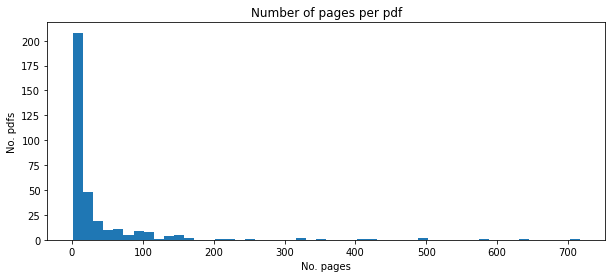

In [14]:
v = dfs[['file', 'pg']].groupby(['file']).pg.nunique()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

Text(0.5, 1.0, 'Number of pages per pdf')

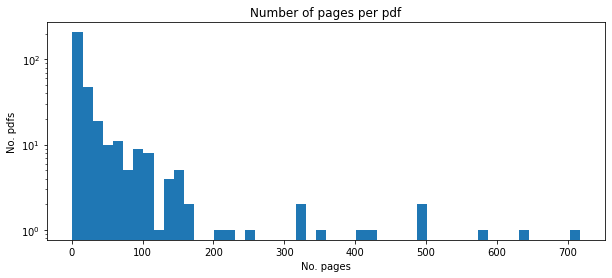

In [15]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [17]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]
v.describe(percentiles=percentiles).to_frame()

,pg
count,343.000000
mean,39.236152
std,88.132341
min,1.000000
0%,1.000000
1%,1.000000
10%,1.000000
20%,3.000000
25%,4.000000
30%,6.000000


**analysis** (remember thisis a sample) there documents in this dataset are shorter overall than the nrcan docs (median down from 32 -> 10 pg)
The max number of pg/file is also lower 1599 -> 717.

In [32]:
dfs[dfs.text.isnull()].shape

(8002752, 15)

In [33]:
dfs = dfs[~dfs.text.isnull()]

Text(0.5, 1.0, 'Number of pages per pdf')

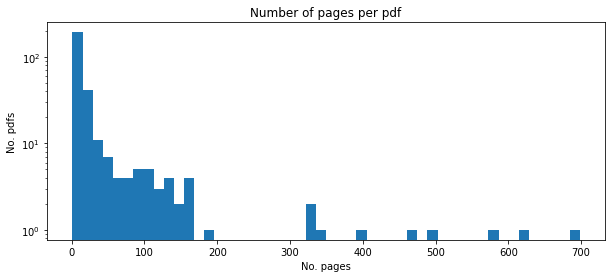

In [35]:
v = dfs[['file', 'pg']].groupby(['file']).pg.nunique()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [36]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]
v.describe(percentiles=percentiles).to_frame()

,pg
count,292.000000
mean,36.400685
std,88.671914
min,1.000000
0%,1.000000
1%,1.000000
10%,1.000000
20%,3.000000
25%,4.000000
30%,6.000000


In [38]:
292/342

0.8538011695906432

**analysis** note that we went from 342 -> 292 documents (15% loss)

## Width/height

In [18]:
dfs['width'] = dfs.pos_x1 - dfs.pos_x0
print('...height')
dfs['height'] = dfs.pos_y1 - dfs.pos_y0

...height


[None]

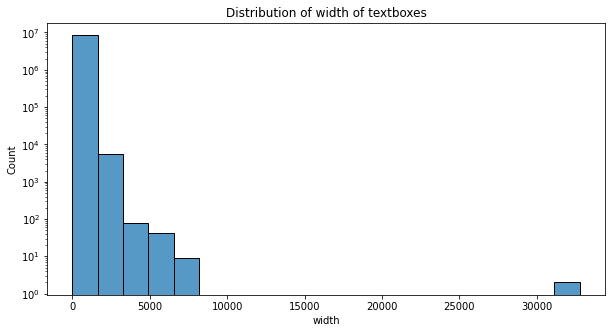

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='width', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of width of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

[None]

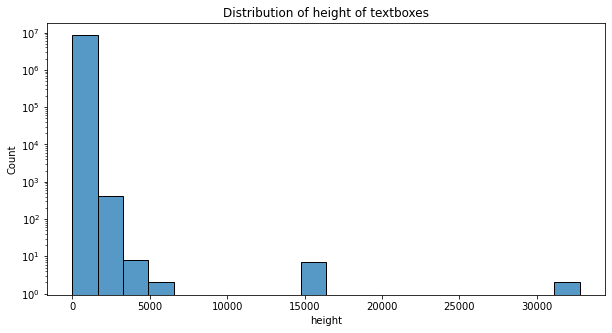

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='height', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of height of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

## N chars

In [22]:
dfs['nchars_stripped'] = dfs.text.str.strip().str.len()

[None]

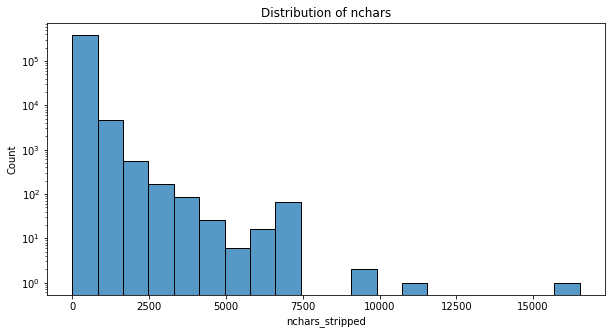

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='nchars_stripped', label='nchars_stripped', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

In [24]:
dfs[dfs.nchars_stripped > 15000]

,Unnamed: 0,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nchars_stripped
61,61,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0.0,1367.31398,164.318419,2257.096942,366.750622,(cid:84)(cid:104)(cid:101)(cid:32)(cid:114)(ci...,/nrcan_p2/data/02_intermediate/20210108/bc__pe...,889.782962,202.432202,16516.0


**analyiss** looks like it definitely needs the CID removal

In [27]:
import pathlib
REPO_DIR = pathlib.Path(__name__).parent.absolute().parent
print(REPO_DIR)

import sys
sys.path.append(str(REPO_DIR))

/nrcan_p2/workspace/sraimondo/nrcan_p2


In [163]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE, SIMPLE_PIPELINE_GLOVE_3, SIMPLE_PIPELINE_BERT_3, POSTPIPE_GLOVE, POSTPIPE_BERT_SPACY

In [29]:
BASE_PIPELINE

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_dbl_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_cid(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.convert_to_ascii(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_nonprintable(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_word_all_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_beg_end_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_punct_mid_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <func

In [30]:
dfs['text_-1'] = dfs['text']

In [39]:
for i in range(0,4):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

<ipython-input-39-5265fbf7f38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])


In [41]:
i = 3
dfs[f'nchars_{i}'] = dfs[f'text_{i}'].str.len()

<ipython-input-41-a579087aa93b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[f'nchars_{i}'] = dfs[f'text_{i}'].str.len()


[None]

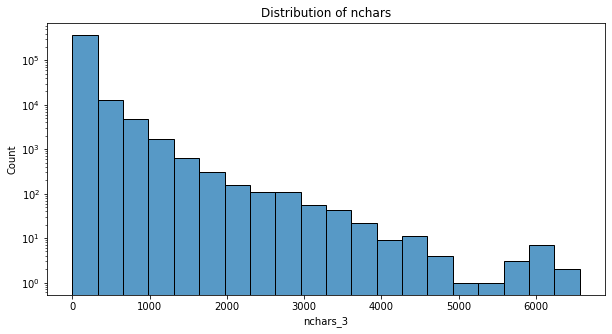

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x=f'nchars_{i}', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

In [44]:
dfs[dfs[f'nchars_{i}'] > 5000]

,Unnamed: 0,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nchars_stripped,text_-1,text_0,text_1,text_2,text_3,nchars_3
23,23,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,72.000000,115.116000,542.520000,722.730360,Contents \nAcknowledgements .....................,/nrcan_p2/data/02_intermediate/20210108/albert...,470.520000,607.614360,6594.0,Contents \nAcknowledgements .....................,Contents \nAcknowledgements .....................,Contents \nAcknowledgements .....................,Contents \nAcknowledgements .....................,Contents \nAcknowledgements .....................,6565
96,96,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,71.989000,77.125300,539.016000,722.428300,Contents\nForeword ..............................,/nrcan_p2/data/02_intermediate/20210108/albert...,467.027000,645.303000,6182.0,Contents\nForeword ..............................,Contents\nForeword ..............................,Contents\nForeword ..............................,Contents\nForeword ..............................,Contents\nForeword ..............................,6134
105,105,<class 'pdfminer.layout.LTTextBoxHorizontal'>,6.0,71.879000,75.396000,536.002000,723.450000,6 Bedrock Topography and Buried Channels ......,/nrcan_p2/data/02_intermediate/20210108/albert...,464.123000,648.054000,6316.0,6 Bedrock Topography and Buried Channels ......,6 Bedrock Topography and Buried Channels ........,6 Bedrock Topography and Buried Channels ........,6 Bedrock Topography and Buried Channels ........,6 Bedrock Topography and Buried Channels ........,6261
82,82,<class 'pdfminer.layout.LTTextBoxHorizontal'>,3.0,71.998000,77.125300,539.304300,722.428300,Contents \nAcknowledgments ......................,/nrcan_p2/data/02_intermediate/20210108/albert...,467.306300,645.303000,6177.0,Contents \nAcknowledgments ......................,Contents \nAcknowledgments ......................,Contents \nAcknowledgments ......................,Contents \nAcknowledgments ......................,Contents \nAcknowledgments ......................,6133
152,152,<class 'pdfminer.layout.LTTextBoxHorizontal'>,4.0,117.140000,77.664000,551.555140,680.860000,Table of Contents ...............................,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,434.415140,603.196000,5900.0,Table of Contents ...............................,Table of Contents ...............................,Table of Contents ...............................,Table of Contents ...............................,Table of Contents ...............................,5907
157,157,<class 'pdfminer.layout.LTTextBoxHorizontal'>,5.0,63.024000,75.264000,496.995040,710.380000,E04 - Sediment-hosted Cu-Ag-Co ..................,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,433.971040,635.116000,5978.0,E04 - Sediment-hosted Cu-Ag-Co ..................,E04 - Sediment-hosted Cu-Ag-Co ..................,E04 - Sediment-hosted Cu-Ag-Co ..................,E04 - Sediment-hosted Cu-Ag-Co ..................,E04 - Sediment-hosted Cu-Ag-Co ..................,5980
161,161,<class 'pdfminer.layout.LTTextBoxHorizontal'>,6.0,117.140000,75.264000,551.115040,710.380000,I05 - Polymetallic Veins Ag-Pb-ZnAu ............,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,433.975040,635.116000,6065.0,I05 - Polymetallic Veins Ag-Pb-ZnAu ............,I05 - Polymetallic Veins Ag-Pb-ZnAu ............,I05 - Polymetallic Veins Ag-Pb-ZnAu ............,I05 - Polymetallic Veins Ag-Pb-ZnAu .............,I05 - Polymetallic Veins Ag-Pb-ZnAu .............,6068
164,164,<class 'pdfminer.layout.LTTextBoxHorizontal'>,7.0,63.024000,91.224000,496.995040,710.380000,N01 - Carbonatite-Associated Deposits:Magmatic...,/nrcan_p2/data/02_intermediate/20210108/bc__ge...,433.971040,619.156000,5734.0,N01 - Carbonatite-Associated Deposits:Magmatic...,N01 - Carbonatite-Associated Deposits:Magmatic...,N01 - Carbonatite-Associated Deposits:Magmatic...,N01 - Carbonatite-Associated Deposits:Magmatic...,N01 - Carbonatite-Associated Deposits:Magmatic...,5732

In [47]:
dfs = dfs.reset_index(drop=True)

In [52]:
BASE_PIPELINE[i]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>

In [ ]:
for i in range(4):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [50]:
i = 4
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [51]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_3
178098,14.5\n
251624,17' \n
294164,3 \n3 \n8 5 \n
366641,. .. . \n
195094,1992\n1992\n
44711,60\n
172881,1 3 2 \n
75633,0.3\n
139168,1999\n
357558,1939: \n


In [55]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(382708, 19)
(265777, 19)
0.30553581320484546


In [61]:
dfs = dfs_filtered

In [64]:
dfs.shape

(265777, 20)

**analysis** this removed 30% of the boxes (Which is almost the same as nrcan)

In [56]:
i = 5
BASE_PIPELINE[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_word_all_punct(dfcol)>

In [62]:
for i in range(5,6):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-2}'])

In [63]:
last_i = i-2
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
print(res.shape)
res = res.sample(20)
res[[f'text_{last_i}', f'text_{i}']]

(46561, 20)


,text_3,text_5
192512,SILVER. CATHERINE. \n82F16W . . . . . . . \n,SILVER. CATHERINE. \n82F16W \n
349311,est regie par les conditions decrites sur cett...,est regie par les conditions decrites sur cett...
297449,. l i l y \n,l i l y \n
81935,S\n#\n,S\n\n
258482,ACCESS: By old Cariboo highway north from Ques...,ACCESS: By old Cariboo highway north from Ques...
34984,%\nU\n,\nU\n
151165,Boundary Mining Association *\n,Boundary Mining Association \n
30453,%\nU\n,\nU\n
32879,%\nU\n,\nU\n
26989,%\nU %U\n%\nU\nU\n%\n,\nU %U\n\nU\nU\n\n


In [66]:
46561/dfs.shape[0]

0.17518822170466217

In [67]:
print('number of characters overall pre:')
a = dfs[f'text_{i-2}'].str.len().sum()
print('number of characters overall post:')
b = dfs[f'text_{i}'].str.len().sum()
print(a, b, b/a, 1-b/a)

number of characters overall pre:
number of characters overall post:
25097653 24517649 0.9768901100035131 0.023109889996486888


**analysis** this affected 67k rows (17%), and they look reasonable, about 2% of the text (about the same as nrcan)

In [69]:
BASE_PIPELINE[6:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_beg_end_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_punct_mid_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dic

In [70]:
for i in range(6,10):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [71]:
dfs.to_parquet(f'/nrcan_p2/data/02_intermediate/20210119/dataset_b_{i}.parquet')

In [113]:
import pandas as pd
dfs = pd.read_parquet(f'/nrcan_p2/data/02_intermediate/20210119/dataset_b_9.parquet')

In [79]:
9316/dfs.shape[0]

0.03505194204163641

In [76]:
i = 6
last_i = i-1
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res.shape)
res = res.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(9316, 24)

,text_5,text_6
188038,found in barite within a limestone for- \nmati...,found in barite within a limestone formation. ...
140258,The dormant Blackdome gold-silver mine of J-Pa...,The dormant Blackdome gold-silver mine of J-Pa...
320841,and desorption data from 2004 and 2006 (Figure...,and desorption data from 2004 and 2006 (Figure...
321604,An alternative approach that uses water chemis...,An alternative approach that uses water chemis...
193113,Serengeti Resources Inc continued to delineate...,Serengeti Resources Inc continued to delineate...
319439,The target areas were classified into moderate...,The target areas were classified into moderate...
310185,Comparison of the broad lithological compositi...,Comparison of the broad lithological compositi...
131660,"The Sulphurets district, 60 km northwest of St...","The Sulphurets district, 60 km northwest of St..."
269828,GAMSBY RIVER STOCK (UNIT EGM)\nThe Gamsby Rive...,GAMSBY RIVER STOCK (UNIT EGM)\nThe Gamsby Rive...
311303,The burning characteristics of high-rank low-v...,The burning characteristics of high-rank low-v...


array(['found in barite within a limestone for- \nmation. The claim is underlain by a northeasterly trending Jurassic \npyroclastic-sedimentary sequence. \n',
       'found in barite within a limestone formation. The claim is underlain by a northeasterly trending Jurassic \npyroclastic-sedimentary sequence. \n'],
      dtype=object)

**analysis** 9k rows affected by the hyphenation (3%)

In [80]:
i = 7
last_i = i-1
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res.shape)
res = res.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(9508, 24)

,text_6,text_7
154578,)I \nSOo \n,I \nSOo \n
346642,0- o 0 g*\n,0- o 0 g\n
376133,-MDI #KP0160 \n-MDI #KP0161 \n,MDI #KP0160 \n-MDI #KP0161 \n
356713,One olivine diabase dike about 80 feet thick i...,One olivine diabase dike about 80 feet thick i...
349950,S C^ en x*\n,S C en x\n
18285,>A@ AJD= A F JA JE= =?H II >AHJ= EI >AE C =...,>A AJD A F JA JE =?H II >AHJ EI >AE C =IIAI...
345161,-J -4.0 \n,J -4.0 \n
188057,(94C/3W) \nThree kilometres northeast of the H...,(94C/3W) \nThree kilometres northeast of the H...
268061,The Tommy and Ted veins are the best ex plored...,The Tommy and Ted veins are the best ex plored...
354754,H2O-\n,H2O\n


array([')I \nSOo \n', 'I \nSOo \n'], dtype=object)

In [ ]:
**analysis** affects 9.5k rows about 3%

In [83]:
i = 8
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.replace(' +', ' ') != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

<ipython-input-83-2a0d32b83fb2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  res_all = dfs[dfs[f'text_{last_i}'].str.replace(' +', ' ') != dfs[f'text_{i}']]


(2733, 24)

,text_7,text_8
352459,inks to Other Web Sites: This Content may cont...,inks to Other Web Sites: This Content may cont...
278789,"P.T. Bobrowsky, G.E.M. Hall and S.J. Cook (ed....","P.T. Bobrowsky, G.E.M. Hall and S.J. Cook (ed...."
340751,INTRODUCTION.....................................,INTRODUCTION.. 3 \n
491,"Richardson, R.N.W. DiLabio and K.A. Richardson...","Richardson, R.N.W. DiLabio and K.A. Richardson..."
270831,subsurface fugitive gas leakage in an area tha...,subsurface fugitive gas leakage in an area tha...
310697,Qualitative interpretation of potential field ...,Qualitative interpretation of potential field ...
278754,http://www.empr.gov.bc.ca/Mining/Geoscience/Pu...,http:/www.empr.gov.bc.ca/Mining/Geoscience/Pub...
312351,"Simandl, G.J., Paradis, S. and Birkett, T. (19...","Simandl, G.J., Paradis, S. and Birkett, T. (19..."
193740,Highlights.......................................,Highlights.. 25\nExploration and Production Tr...
325012,"JPT website, (2008): http://updates.spe.org/in...","JPT website, (2008): http:/updates.spe.org/ind..."


array(['inks to Other Web Sites: This Content may contain links, to Web sites that are not operated by MNDMF. \nLinked Web sites may not be available in French. MNDMF neither endorses nor assumes any responsibility \nfor the safety, accuracy or availability of linked Web sites or the information contained on them. The linked \nWeb sites, their operation and content are the responsibility of the person or entity for which they were \ncreated or maintained (the "Owner"). Both your use of a linked Web site, and your right to use or reproduce \ninformation or materials from a linked Web site, are subject to the terms of use governing that particular \nWeb site. Any comments or inquiries regarding a linked Web site must be directed to its Owner. \n',
       'inks to Other Web Sites: This Content may contain links, to Web sites that are not operated by MNDMF. \nLinked Web sites may not be available in French. MNDMF neither endorses nor assumes any responsibility \nfor the safety, accuracy or

In [91]:
res_all.sample(10)[[f'text_{last_i}', f'text_{i}']]

,text_7,text_8
272800,"Mackay, M.L., Leeder, R.L., Giroux, L., Dexter...","Mackay, M.L., Leeder, R.L., Giroux, L., Dexter..."
310686,Quaternary GeoloGy and aGGreGate potential of ...,Quaternary GeoloGy and aGGreGate potential of ...
360915,inks to Other Web Sites: This Content may cont...,inks to Other Web Sites: This Content may cont...
347884,"M. f*^'''-""*'*'m \n",M. f*'m \n
297,"Compared with the Sweet Grass Hills, ultrapota...","Compared with the Sweet Grass Hills, ultrapota..."
292046,At the low e l e v a t i on s i te (77-1) with...,At the low e l e v a t i on s i te (77-1) with...
376886,"SEE PAGE 14-1 ...NOTES, FOR ITEMS LISTED BY NU...","SEE PAGE 14-1 ..NOTES, FOR ITEMS LISTED BY NUM..."
325017,Southern Methodist University Geothermal Labor...,Southern Methodist University Geothermal Labor...
90153,"Appendices, including datafiles, for this GeoF...","Appendices, including datafiles, for this GeoF..."
312530,"Peters, K.E., and Cassa, M.R., 1994, Applied S...","Peters, K.E., and Cassa, M.R., 1994, Applied S..."


In [96]:
res_all.sample(10)[[f'text_{last_i}', f'text_{i}']]

,text_7,text_8
236383,The Belcourt-Saxon joint venture project of th...,The Belcourt-Saxon joint venture project of th...
153436,"Ltd.). 1220, One Bentall Centre, Vancouver 1. ...","Ltd.. 1220, One Bentall Centre, Vancouver 1. \..."
345387,"s \n\^,,-8^"" MMR\n","s \n\-8^"" MMR\n"
315005,Petrographic Summary.............................,Petrographic Summary..7 \n
339293,inks to Other Web Sites: This Content may cont...,inks to Other Web Sites: This Content may cont...
13084,The base of the arkosic member may be used to ...,The base of the arkosic member may be used to ...
314349,"O'Connell, S.C. (1994): Geological history of ...","O'Connell, S.C. (1994): Geological history of ..."
365063,V \n1\n7 \n1 \n 7 \n\n/..L.\n-1 7-\n/l l7\n7 \n,V \n1\n7 \n1 \n 7 \n\n/.L.\n-1 7-\n/l l7\n7 \n
19154,geological subsurface models for geotechnical ...,geological subsurface models for geotechnical ...
18239,@EBEA BH ?+=>A AJ \n,@EBEA BH ?>A AJ \n


**analysis** This is the mistake: "(Nb+Ta)>=2Ti)" -> "(Nb + Ta)=2Ti"
    (the "Owner") -> (the "Owner".

In [101]:
BASE_PIPELINE[9]

<function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>

In [100]:
i = 9
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(265752, 24)

,text_8,text_9
319740,Zone II shows consistently elevated values (>...,Zone II shows consistently elevated values (>1...
24226,\nU\n,\nU\n
261687,Sayward\n,Sayward\n
192993,Au \n,Au \n
31852,\nU\n,\nU\n
262239,geol; geochem\n,geol; geochem\n
312502,The next step in this project is to apply one-...,The next step in this project is to apply one-...
19279,Summary\nTo-date limited work has been complet...,Summary\nTo-date limited work has been complet...
41652,Element concentrations for each sample are the...,Element concentrations for each sample are the...
36294,\nU\n,\nU\n


array([' Zone II shows consistently elevated values (>1370 \nohm-m, purples). These values suggest sand or gravel \nand are interpreted to have high potential for granular \nmaterial. \n',
       'Zone II shows consistently elevated values (>1370 \nohm-m, purples). These values suggest sand or gravel \nand are interpreted to have high potential for granular \nmaterial. \n'],
      dtype=object)

In [103]:
BASE_PIPELINE[9:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>]

In [114]:
i = 10
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [105]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_9
176104,Cassiar \n
298052,These \n
49290,A\n
49608,C\n
26657,\nU\n
85894,5890000m.N\n
44769,Al\n
5534,Silt\n
120780,83E83E\n
54409,T\n


In [106]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(265777, 24)
(184935, 24)
0.30417229481858854


In [115]:
dfs = dfs_filtered

**analysis** This removed 30% of the boxes!(vs 25%)

In [116]:
i = 11
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-2}')

In [117]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-2}']]

,text_9
349375,O 0\n
14511,p\ng\n
85798,S\nS\n\n\n
372542,b\nt\n
17634,6 A\n
262460,V i \n
96392,n 3\n
139097,R i\n
31659,\nU\nU\n\n
134485,D\nD\n


In [118]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(184935, 24)
(184119, 24)
0.004412361099845885


**analysis** this removed only 0.4% of boxes (far fewer than NRCan)

In [120]:
BASE_PIPELINE[11:]

[<function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>]

In [123]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'width', 'height', 'nchars_stripped', 'text_-1',
       'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3', 'letter_count',
       'text_5', 'text_6', 'text_7', 'text_8', 'text_9'],
      dtype='object')

In [124]:
i = 12
dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_9'])

In [125]:
for i in range(13,16):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [127]:
i = 12
last_i = 9
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(21293, 28)

,text_9,text_12
136965,W_ppm Method\n,Wppm Method\n
201217,"Springer zone has not yet been developed, but ...","Springer zone has not yet been developed, but ..."
320566,"Hoy, T. 1975: Geology of a Tertiary sedimentar...","Hoy, T. 1975: Geology of a Tertiary sedimentar..."
330455,The Lower Halfway D oil pool is on the downthr...,The Lower Halfway D oil pool is on the downthr...
304282,of \nthe cliff-forming Middle Cambrian Cathedr...,of \nthe cliff-forming Middle Cambrian Cathedr...
11707,(mg/L)\n<0.080\n0.036\n0.021\n,(mgL)\n<0.080\n0.036\n0.021\n
308856,"Ward, J.E. \nWard, J.E. \nWard, J.E. \nBaynham...","Ward, J.E. \nWard, J.E. \nWard, J.E. \nBaynham..."
178567,\nFigure 11. Diamond drilling on the Dewdney T...,\nFigure 11. Diamond drilling on the Dewdney T...
231119,478 MARMOT.g4D/lOE \n,478 MARMOT.g4DlOE \n
295461,BC Min is ter of Mines (1916b): Fido; BC Min i...,BC Min is ter of Mines (1916b: Fido; BC Min is...


array(['W_ppm Method\n', 'Wppm Method\n'], dtype=object)

In [128]:
display(res[[f'text_{last_i}', f'text_{i}']].iloc[4].values)

array(['of \nthe cliff-forming Middle Cambrian Cathedral Formation \n(Table 3-5-l) which ranges from 240 to 580 metres in thickness. The magnesite \nto buff \nc&wed, weathering buff to rusty. At the Baymag deposit, \nthe main pit contains very pure white magnesite. Several \nother magnesite beds were mapped in the area by Leech \n(1966b), and those opposite the mine, on the flanks of Mount \nBmssilof, were studied in detail by Godfrey (1969). \n',
       'of \nthe cliff-forming Middle Cambrian Cathedral Formation \n(Table 3-5-l) which ranges from 240 to 580 metres in thickness. The magnesite \nto buff \ncwed, weathering buff to rusty. At the Baymag deposit, \nthe main pit contains very pure white magnesite. Several \nother magnesite beds were mapped in the area by Leech \n(1966b, and those opposite the mine, on the flanks of Mount \nBmssilof, were studied in detail by Godfrey (1969). \n'],
      dtype=object)

In [ ]:
**analysis** I should probably fix this regex: (1966b), -> (1966b,

In [129]:
i = 13
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(57945, 28)

,text_12,text_13
380682,"""Mining Briefs; Uchi Gold Mine tonnage. \n",Mining Briefs; Uchi Gold Mine tonnage. \n
8165,EUBAGS Special Report 098 (June 2002) 308\n,EUBAGS Special Report 098 June 2002 308\n
179176,are both zinc oxides (weathered zones) and zin...,are both zinc oxides weathered zones and zinc ...
251743,CLAIMS: DISPATCHER (Lot \n,CLAIMS: DISPATCHER Lot \n
19286,"Brodaric, B., Paul, D., St-Onge, M.R., and Har...","Brodaric, B., Paul, D., St-Onge, M.R., and Har..."
144923,The coal measures at Willow Creek occur within...,The coal measures at Willow Creek occur within...
290527,Distances of v a r i o u s d e p o s i t s \nm...,Distances of v a r i o u s d e p o s i t s \nm...
225694,Figure F) \n,Figure F \n
312517,"Asgar-Deen, M., 2003, Stratigraphy, Sedimentol...","Asgar-Deen, M., 2003, Stratigraphy, Sedimentol..."
234296,"(093N.067, \n068, 077, 078) \n093A 121 \n","093N.067, \n068, 077, 078 \n093A 121 \n"


array(['"Mining Briefs; Uchi Gold Mine tonnage. \n',
       'Mining Briefs; Uchi Gold Mine tonnage. \n'], dtype=object)

**analysis** "M -> M, this looks problematic

In [132]:
BASE_PIPELINE[14]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>

In [131]:
i = 14
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(184931, 28)

,text_13,text_14
181716,CLAIMS: \nOWNERS: \nOPERATOR: \n,CLAIMS: OWNERS: OPERATOR:
179023,"082FNE115, \n117 \n","082FNE115, 117"
179251,Figures \nE-1 \n,Figures E-1
157555,Report 3524. \n,Report 3524.
259150,"Balmer No. I South Mine.-Arnold Webster, overm...","Balmer No. I South Mine.-Arnold Webster, overm..."
324137,94 H 14\n94 H 14\n94-H-14\n94-H-14\n,94 H 14 94 H 14 94-H-14 94-H-14
300120,for Olympic \n Dam \n,for Olympic Dam
286132,"Geo log i cal Field work 2006, Pa per 2007-1\n","Geo log i cal Field work 2006, Pa per 2007-1"
187965,SEABEE Fig. \n,SEABEE Fig.
225919,including the key \n,including the key


array(['CLAIMS: \nOWNERS: \nOPERATOR: \n', 'CLAIMS: OWNERS: OPERATOR: '],
      dtype=object)

In [134]:
BASE_PIPELINE[15]

<function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>

In [135]:
i = 15
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(19551, 28)

,text_14,text_15
40771,S SS S,SSS S
13228,phragmoides sp. A but is treated as a separate...,phragmoides sp. Abut is treated as a separate ...
340458,PREC AMBRIAN GEOLOGY,PRECAMBRIAN GEOLOGY
286703,t h e Eocene v o l c a n i c r o s ot t h e Tu...,the Eocene volcanic r o sot the Tu Ia men bas ...
219959,and 45; from existing access road t o,and 45; from existing access road to
191770,M.82E13W M. 93F6 M.93Li14W M. 9 3 N i l l W,M.82E13W M. 93F6 M.93Li14W M. 9 3 Nil l W
297113,"During the summer of 1977, approximately 120 s...","During the summer of 1977, approximately 120 s..."
301590,"bee analyzed. Complete U-Pb analytic.,1 employ...","bee analyzed. Complete U-Pb analytic.,1 employ..."
337052,Contour interval is two metres net Doig B oil ...,Contour interval is two metres net Doig Boil p...
86172,S S,SS


array([' S SS S ', 'SSS S'], dtype=object)

In [137]:
display(res[[f'text_{last_i}', f'text_{i}']].iloc[3].values)

array(['t h e Eocene v o l c a n i c r o s ot t h e Tu I a m e n bas I n. i s placed near the boundary ',
       'the Eocene volcanic r o sot the Tu Ia men bas I n. is placed near the boundary'],
      dtype=object)

In [138]:
BASE_PIPELINE[16]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>

In [139]:
i = 16
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [140]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_15
23446,U U
34680,U U
258842,I RP and WS. I RP and WS.
217978,"Fig. C, No. IO"
152379,"COX, Box 1165, Fabens.Texas79838."
221350,"R, RB 936-27 Long."
288536,in a fine-grained matrix.
200267,"Cu, Au"
349940,3 4-1co o 0x:
366524,07 o


In [141]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(184935, 32)
(134823, 32)
0.27097088166112415


In [145]:
dfs = dfs_filtered

**analysis** this filter actually removed 27% of the documents

## Glove, specifically

In [148]:
SIMPLE_PIPELINE_GLOVE_3[17:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.tokenize_spacy_lg(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_stopwords_spacy(dfcol)>]

In [149]:
dfs_glove = dfs

In [152]:
dfs_glove.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'width', 'height', 'nchars_stripped', 'text_-1',
       'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3', 'letter_count',
       'text_5', 'text_6', 'text_7', 'text_8', 'text_9', 'text_12', 'text_13',
       'text_14', 'text_15', 'is_enchant_word', 'word_char_num',
       'is_enchant_word_and_g3l', 'any_enchant_word_and_g3l'],
      dtype='object')

In [154]:
for i in range(17,18):
    dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-2}'])

<ipython-input-154-316d9d9e945c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-2}'])


In [155]:
for i in range(18,19):
    dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-1}'])

<ipython-input-155-3a7151bed0cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-1}'])


In [156]:
i = 17
last_i = i-2
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(89745, 34)

,text_15,text_17
278673,"Aario, R., Peuraniemi, V., 1992. Glacial dispe...","Aario , R. , Peuraniemi , V. , 1992 . Glacial ..."
275057,samples at every site; and,samples at every site ; and
321347,Kelvin mean radius of pore m surface tension N...,Kelvin mean radius of pore m surface tension N...
177831,The Hillsbar Aggregate Project as proposed in ...,The Hillsbar Aggregate Project as proposed in ...
244097,SILVER STANDARD MINE 55 127 S.W. Northwestern ...,SILVER STANDARD MINE 55 127 S.W. Northwestern ...
222388,"Fig. D, No. 66 Lat. 55O 24 Long. OMINECA M.D. ...","Fig . D , No . 66 Lat . 55O 24 Long . OMINECA ..."
61585,"British Columbia Ministry of Energy, Mines and...","British Columbia Ministry of Energy , Mines an..."
55319,"SSOCIATED DEPOSIT TYPES: Sn K06, Mo K07 and Pb...","SSOCIATED DEPOSIT TYPES : Sn K06 , Mo K07 and ..."
356917,"Beaumont Gold Mines Limited, p. 42.","Beaumont Gold Mines Limited , p. 42 ."
319841,"Levson, V.M., Ferbey, T., Hickin, A., Bednarsk...","Levson , V.M. , Ferbey , T. , Hickin , A. , Be..."


array(['Aario, R., Peuraniemi, V., 1992. Glacial dispersal of till constituents in morainic landforms of different',
       'Aario , R. , Peuraniemi , V. , 1992 . Glacial dispersal of till constituents in morainic landforms of different'],
      dtype=object)

**analysis** 89k rows affected. Note that R., -> R. , (properly handled) (more of a case for removal of some of stages 12, 10, 13)

In [159]:
dfs.shape

(134823, 34)

In [157]:
i = 18
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

(86273, 34)

,text_17,text_18
47333,Columbia Geological Survey mineral deposit pro...,Columbia Geological Survey mineral deposit pro...
246446,"ACCESS : Byroad from Kitsault , a distance of ...","ACCESS : Byroad Kitsault , distance 2 miles . ..."
182231,WORK DONE : Road construction and sampling . R...,WORK : Road construction sampling . REFERENCES...
146504,Exploration for gold in the Greenwood area has...,Exploration gold Greenwood area active ongoing...
242969,HCC of medium - volatile bituminous rank is be...,HCC medium - volatile bituminous rank mined Lo...
221501,intruded by an irregular stock of porphyritic ...,intruded irregular stock porphyritic rhyolite ...
162332,"of 3,800 and 5,000 feet on the","3,800 5,000 feet"
310549,A gamma - ray spectroscopic log across the out...,gamma - ray spectroscopic log outcrop defines...
194509,Doublestar Resources Limited acquired Falconbr...,Doublestar Resources Limited acquired Falconbr...
52514,by Andre Panteleyev1,Andre Panteleyev1


array(['Columbia Geological Survey mineral deposit profile published on website , 5 p.',
       'Columbia Geological Survey mineral deposit profile published website , 5 p.'],
      dtype=object)

In [ ]:
**analysis** stopword removal affects only 86k /134k rows, seems reasonable. 

In [164]:
POSTPIPE_GLOVE

[<function nrcan_p2.data_processing.preprocessing_str.rm_punct(text: str)>,
 <function nrcan_p2.data_processing.preprocessing_str.lower(text: str)>,
 <function nrcan_p2.data_processing.preprocessing_str.rm_newline(text: str)>]

In [165]:
dfs['text_POST'] = dfs.text_18 + ' '
merged_dfs = dfs.groupby('file').text_POST.sum()
merged_dfs

<ipython-input-165-bf7627eab799>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['text_POST'] = dfs.text_18 + ' '


file
/nrcan_p2/data/02_intermediate/20210108/alberta__document_BUL_BUL_002.pdfminer_split.txt        PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_ESR_ESR_2006_05.pdfminer_split.txt    EUBAGS Earth Sciences Report 2006 - 05 Subsurf...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_INF_INF_124.pdfminer_split.txt        Information Series 124 Alberta Geological Surv...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_09.pdfminer_split.txt    ERCBAGS Open File Report 2011 - 09 Inorganic W...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_13.pdfminer_split.txt    ERCBAGS Open File Report 2011 - 13 Subsurface ...
                                                                                                                      ...                        
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0171.pdfminer_split.txt                 TERMS GOVERN USE DOCUM

In [166]:
merged_dfs = merged_dfs.to_frame()

In [167]:
merged_dfs

,text_POST
file,
/nrcan_p2/data/02_intermediate/20210108/alberta__document_BUL_BUL_002.pdfminer_split.txt,PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_ESR_ESR_2006_05.pdfminer_split.txt,EUBAGS Earth Sciences Report 2006 - 05 Subsurf...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_INF_INF_124.pdfminer_split.txt,Information Series 124 Alberta Geological Surv...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_09.pdfminer_split.txt,ERCBAGS Open File Report 2011 - 09 Inorganic W...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_13.pdfminer_split.txt,ERCBAGS Open File Report 2011 - 13 Subsurface ...
...,...
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0171.pdfminer_split.txt,TERMS GOVERN USE DOCUMENT use Ontario Geolog...
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0266-rev.pdfminer_split.txt,TERMS GOVERN USE PRODUCT use electronic info...
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0359.pdfminer_split.txt,TERMS GOVERN USE DOCUMENT use Ontario Geolog...


In [169]:
for i in [0]: #range(len(POSTPIPE_GLOVE)):
    merged_dfs[f'text_POST_{i}'] = merged_dfs[f'text_POST'].apply(POSTPIPE_GLOVE[i])

In [170]:
for i in range(1,len(POSTPIPE_GLOVE)):
    merged_dfs[f'text_POST_{i}'] = merged_dfs[f'text_POST_{i-1}'].apply(POSTPIPE_GLOVE[i])

In [176]:
len(merged_dfs.iloc[0].text_POST_2)

100468

In [177]:
merged_dfs

,text_POST,text_POST_0,text_POST_1,text_POST_2
file,,,,
/nrcan_p2/data/02_intermediate/20210108/alberta__document_BUL_BUL_002.pdfminer_split.txt,PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...,PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOL...,province alberta research council alberta geol...,province alberta research council alberta geol...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_ESR_ESR_2006_05.pdfminer_split.txt,EUBAGS Earth Sciences Report 2006 - 05 Subsurf...,EUBAGS Earth Sciences Report 2006 05 Subsurfac...,eubags earth sciences report 2006 05 subsurfac...,eubags earth sciences report 2006 05 subsurfac...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_INF_INF_124.pdfminer_split.txt,Information Series 124 Alberta Geological Surv...,Information Series 124 Alberta Geological Surv...,information series 124 alberta geological surv...,information series 124 alberta geological surv...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_09.pdfminer_split.txt,ERCBAGS Open File Report 2011 - 09 Inorganic W...,ERCBAGS Open File Report 2011 09 Inorganic Wat...,ercbags open file report 2011 09 inorganic wat...,ercbags open file report 2011 09 inorganic wat...
/nrcan_p2/data/02_intermediate/20210108/alberta__document_OFR_OFR_2011_13.pdfminer_split.txt,ERCBAGS Open File Report 2011 - 13 Subsurface ...,ERCBAGS Open File Report 2011 13 Subsurface St...,ercbags open file report 2011 13 subsurface st...,ercbags open file report 2011 13 subsurface st...
...,...,...,...,...
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0171.pdfminer_split.txt,TERMS GOVERN USE DOCUMENT use Ontario Geolog...,TERMS GOVERN USE DOCUMENT use Ontario Geologi...,terms govern use document use ontario geologi...,terms govern use document use ontario geologi...
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0266-rev.pdfminer_split.txt,TERMS GOVERN USE PRODUCT use electronic info...,TERMS GOVERN USE PRODUCT use electronic infor...,terms govern use product use electronic infor...,terms govern use product use electronic infor...
/nrcan_p2/data/02_intermediate/20210108/ontario__lists__p0359.pdfminer_split.txt,TERMS GOVERN USE DOCUMENT use Ontario Geolog...,TERMS GOVERN USE DOCUMENT use Ontario Geologi...,terms govern use document use ontario geologi...,terms govern use document use ontario geologi...


In [183]:
display(merged_dfs.iloc[0].text_POST[0:1000])

merged_dfs.iloc[0].text_POST_2[0:1000]

'PROVINCE ALBERTA RESEARCH COUNCIL ALBERTA GEOLOGICAL DIVISION BULLETIN 2   Lower Cenomanian Foraminifera Peace River Area , Western Canada University Alberta Department Geology J. H. WALL Research Council Alberta  student , University Alberta R. E. WETTER  II Lower Cenomanian Ammonoidea Pelecypoda  Peace River Area , Western Canada P. S. WARREN C. R. STELCK University Alberta Department Geol09Y PrInted L. S. WALL , Queens Printer Alberta TABLE CONTENTS Foreword Lower Cenomanian Foraminifera Peace River area , Page 4 Western Canada Abstract Introduction Stratigraphy Beatton River section Local faunal succession 5 5 7 Fort St. John group Shaftesbury formation 7 Wilder Creek section 9 Septimus Creek section upper portion 10 11 Septimus Creek section lower portion Fish - scale interval 13 St. John - Dunvegan formation contact 15 15 Dunvegan formation 16 18 21 Upper Cretaceous Lower Cretaceous boundary 21 Regional correlation 22 Ecology 24 26 Formal descriptions 26 26 27 28 29 29 30 31 32 

'province alberta research council alberta geological division bulletin 2 lower cenomanian foraminifera peace river area western canada university alberta department geology j h wall research council alberta student university alberta r e wetter ii lower cenomanian ammonoidea pelecypoda peace river area western canada p s warren c r stelck university alberta department geol09y printed l s wall queens printer alberta table contents foreword lower cenomanian foraminifera peace river area page 4 western canada abstract introduction stratigraphy beatton river section local faunal succession 5 5 7 fort st john group shaftesbury formation 7 wilder creek section 9 septimus creek section upper portion 10 11 septimus creek section lower portion fish scale interval 13 st john dunvegan formation contact 15 15 dunvegan formation 16 18 21 upper cretaceous lower cretaceous boundary 21 regional correlation 22 ecology 24 26 formal descriptions 26 26 27 28 29 29 30 31 32 32 33 genus ammobaculites cushm